# Small price bias in the cryptocurrency market. 
## A cognitive bias revealed by emotions on social networks.


## (0) Prepocessing 

In [2]:
#Importar las librerias requeridas
import numpy as np
import pandas as pd

#Handle dates
import datetime as dt
from datetime import datetime, timedelta


import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import math

#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from linearmodels import PanelOLS, FamaMacBeth
import statsmodels.api as sm

import numpy as np
from statsmodels.datasets import grunfeld
data = grunfeld.load_pandas().data
data.year = data.year.astype(np.int64)
from linearmodels import PanelOLS, PooledOLS
from linearmodels import FamaMacBeth
import statsmodels.api as sm
import pandas as pd

## (1) Data Preparation

In [3]:
pd.options.mode.use_inf_as_na = True

dfPANEL=pd.read_csv('data_enr_filter.csv')

dfPANEL["fecha"] = pd.to_datetime(dfPANEL["fecha"])

In [4]:
dfPANEL.columns

Index(['Unnamed: 0', 'fecha', 'Ticker', 'Positive', 'Neutral', 'Negative',
       'TotalTwits', 'pPositive', 'pNeutral', 'pNegative', 'TotalTwits_1',
       'Positive_1', 'Neutral_1', 'Negative_1', 'zero_twits', 'Fecha', 'Price',
       'ActiveAddress', 'MarketCap', 'log_price', 'price_1', 'log_price_1',
       'returns', 'return_1', 'r', 'r_1', 'mean7_Price', 'past_avg7_r',
       'past_var7_r', 'past_volatility7_r', 'past_skew7_r', 'high', 'low',
       'real_volume', 'daily_abs_range', 'daily_percent_range', 'Date',
       'Volume', 'Estable', 'volume_units', 'real_volume_units',
       'MktCap_units', 'price_percent_rank', 'score_percentile_rank',
       'decile_price_rank', 'Decile_rank'],
      dtype='object')

In [5]:
features=['fecha','Fecha','Ticker',
          'TotalTwits','pPositive','pNegative','pNeutral',
          'TotalTwits_1','Positive_1', 'Neutral_1', 'Negative_1',
          #Variables exogenas
          'Price','price_1','log_price','log_price_1','Estable',
          'Volume','ActiveAddress','MarketCap','volume_units',
          'returns','return_1'
         ]



remove_coins = ['BTM','SNT'
             #   "WTC",
              ,  "POWR"
               ]

dfPANEL_1=dfPANEL[~dfPANEL['Ticker'].isin(remove_coins) ][features]

                  
#Escalar la variable de respuesta a 100%
dfPANEL_1['fecha']=pd.to_datetime(dfPANEL_1['fecha'])
dfPANEL_1['pPOSITIVE']=dfPANEL['pPositive']*100
dfPANEL_1['pNEUTRAL']=dfPANEL['pNeutral']*100
dfPANEL_1['pNEGATIVE']=dfPANEL['pNegative']*100

In [6]:
data_model=dfPANEL_1[dfPANEL_1['fecha']>='2021-07-01'].set_index(['Ticker','fecha']).dropna().copy()
data_model['constant']=1

## (2) EDA - Descriptives

# MODELLING - REGRESSION ANALYSIS

## Small Price Bias . Modelos tipo Aloosh y Ouzan (2020) 

$$Y_{i,t} = \alpha + \beta log(Price_{i,t-1})+\epsilon_{i,t}) $$

### Small Price Bias en positividad
$pPositive_{i,t} = \alpha + \beta log(Price_{i,t-1}) + \epsilon_{i,t} $

**Fama MacBeth**

In [7]:
regfm_pPositive=FamaMacBeth(data_model.pPOSITIVE,data_model[['constant','log_price_1']],weights=None).fit(
    debiased=True,cov_type='robust',kernel="bartlett")

regfm_pPositive

Dep. Variable:,pPOSITIVE,R-squared:,0.0024
Estimator:,FamaMacBeth,R-squared (Between):,0.0392
No. Observations:,20092,R-squared (Within):,-0.0037
Date:,"Fri, Apr 05 2024",R-squared (Overall):,0.0024
Time:,21:40:57,Log-likelihood,-7.914e+04
Cov. Estimator:,Fama-MacBeth Standard Cov,,
,,F-statistic:,47.375
Entities:,39,P-value,0.0000
Avg Obs:,515.18,Distribution:,"F(1,20090)"
Min Obs:,402.00,,
Max Obs:,547.00,F-statistic (robust):,229.33


### Small Price Bias en neutralidad
$pNeutral_{i,t} = \alpha + \beta log(Price_{i,t-1}) + \epsilon_{i,t} $

**Fama MacBeth**

In [8]:
regfm_pNeutral=FamaMacBeth(data_model.pNEUTRAL,data_model[['constant','log_price_1']],weights=None).fit(debiased=True,
    cov_type="kernel", kernel="bartlett")

regfm_pNeutral

Dep. Variable:,pNEUTRAL,R-squared:,0.0049
Estimator:,FamaMacBeth,R-squared (Between):,0.0374
No. Observations:,20092,R-squared (Within):,-0.0030
Date:,"Fri, Apr 05 2024",R-squared (Overall):,0.0049
Time:,21:40:58,Log-likelihood,-8.029e+04
Cov. Estimator:,Fama-MacBeth Kernel Cov,,
,,F-statistic:,99.758
Entities:,39,P-value,0.0000
Avg Obs:,515.18,Distribution:,"F(1,20090)"
Min Obs:,402.00,,
Max Obs:,547.00,F-statistic (robust):,67.231


### Small Price Bias en negatividad
$pNegative_{i,t} = \alpha + \beta log(Price_{i,t-1}) + \epsilon_{i,t} $

#### FamaMacBeth

In [9]:
regfm_pNegative=FamaMacBeth(data_model.pNEGATIVE,data_model[['constant','log_price_1']],weights=None).fit(debiased=True,
    cov_type="robust", kernel="bartlett")

regfm_pNegative

Dep. Variable:,pNEGATIVE,R-squared:,0.0016
Estimator:,FamaMacBeth,R-squared (Between):,0.0025
No. Observations:,20092,R-squared (Within):,0.0010
Date:,"Fri, Apr 05 2024",R-squared (Overall):,0.0016
Time:,21:40:58,Log-likelihood,-6.51e+04
Cov. Estimator:,Fama-MacBeth Standard Cov,,
,,F-statistic:,32.927
Entities:,39,P-value,0.0000
Avg Obs:,515.18,Distribution:,"F(1,20090)"
Min Obs:,402.00,,
Max Obs:,547.00,F-statistic (robust):,56.553


## Small Price Bias . Modelos tipo Roger (2018) 

$$Y_{i,t} = \alpha + \lambda PriceCat_{i,t-1}+\epsilon_{i,t} $$


In [10]:
data_model['cat_price1']=np.where(data_model['Price']<= 1,1,0)
data_model['cat_price2']=np.where((data_model['Price']> 1) & (data_model['Price']<= 10),1,0)
data_model['cat_price3']=np.where((data_model['Price']> 10) & (data_model['Price']<= 100),1,0)
data_model['cat_price4']=np.where((data_model['Price']> 100) & (data_model['Price']<= 1000),1,0)
data_model['cat_price5']=np.where((data_model['Price']> 1000),1,0)

data_model[['Price','cat_price1','cat_price2','cat_price3','cat_price4','cat_price5']].describe()

,Price,cat_price1,cat_price2,cat_price3,cat_price4,cat_price5
count,20092.000000,20092.000000,20092.000000,20092.000000,20092.000000,20092.000000
mean,2085.891081,0.356560,0.232580,0.154340,0.135527,0.120993
std,8535.090385,0.478995,0.422487,0.361283,0.342294,0.326128
min,0.000008,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.741785,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.060000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,105.246353,1.000000,0.000000,0.000000,0.000000,0.000000
max,67541.755510,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
data_model['cat_prev_price1']=np.where(data_model['price_1']<= 1,1,0)
data_model['cat_prev_price2']=np.where((data_model['price_1']> 1) & (data_model['price_1']<= 10),1,0)
data_model['cat_prev_price3']=np.where((data_model['price_1']> 10) & (data_model['price_1']<= 100),1,0)
data_model['cat_prev_price4']=np.where((data_model['price_1']> 100) & (data_model['price_1']<= 1000),1,0)
data_model['cat_prev_price5']=np.where((data_model['price_1']> 1000),1,0)

data_model[['Price','log_price_1','cat_prev_price1','cat_prev_price2',
            'cat_prev_price3','cat_prev_price4','cat_prev_price5']].describe()

,Price,log_price_1,cat_prev_price1,cat_prev_price2,cat_prev_price3,cat_prev_price4,cat_prev_price5
count,20092.000000,20092.000000,20092.000000,20092.00000,20092.000000,20092.000000,20092.000000
mean,2085.891081,1.956566,0.356162,0.23268,0.154340,0.135775,0.121043
std,8535.090385,3.878986,0.478876,0.42255,0.361283,0.342558,0.326186
min,0.000008,-11.774068,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.741785,-0.296688,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2.060000,0.722706,0.000000,0.00000,0.000000,0.000000,0.000000
75%,105.246353,4.659181,1.000000,0.00000,0.000000,0.000000,0.000000
max,67541.755510,11.120501,1.000000,1.00000,1.000000,1.000000,1.000000


### Indice de negatividad

**REZAGADO (t-1)**

In [12]:
regfmRoger_prev_pNegative=FamaMacBeth(data_model.pNEGATIVE,data_model[['constant','cat_prev_price2',
                                                             'cat_prev_price3','cat_prev_price4',
                                                             'cat_prev_price5']],weights=None).fit(debiased=True,
    cov_type="robust", kernel="bartlett")
regfmRoger_prev_pNegative

Dep. Variable:,pNEGATIVE,R-squared:,0.0113
Estimator:,FamaMacBeth,R-squared (Between):,0.0535
No. Observations:,20092,R-squared (Within):,-0.0054
Date:,"Fri, Apr 05 2024",R-squared (Overall):,0.0113
Time:,21:49:09,Log-likelihood,-6.501e+04
Cov. Estimator:,Fama-MacBeth Standard Cov,,
,,F-statistic:,57.330
Entities:,39,P-value,0.0000
Avg Obs:,515.18,Distribution:,"F(4,20087)"
Min Obs:,402.00,,
Max Obs:,547.00,F-statistic (robust):,94.216


### Indice de Positividad

**REZAGADO (t-1)**

In [15]:
regfmRoger_pPositive=FamaMacBeth(data_model.pPOSITIVE,data_model[['constant','cat_prev_price2',
                                                             'cat_prev_price3','cat_prev_price4','cat_prev_price5']],
                                 weights=None).fit(debiased=True,cov_type='robust',kernel='bartlett')

regfmRoger_pPositive

Dep. Variable:,pPOSITIVE,R-squared:,0.0240
Estimator:,FamaMacBeth,R-squared (Between):,0.1020
No. Observations:,20092,R-squared (Within):,0.0103
Date:,"Fri, Apr 05 2024",R-squared (Overall):,0.0240
Time:,21:49:28,Log-likelihood,-7.892e+04
Cov. Estimator:,Fama-MacBeth Standard Cov,,
,,F-statistic:,123.44
Entities:,39,P-value,0.0000
Avg Obs:,515.18,Distribution:,"F(4,20087)"
Min Obs:,402.00,,
Max Obs:,547.00,F-statistic (robust):,123.51


### Indice de Neutralidad
**REZAGADO (t-1)**

In [14]:
regfmRoger_pNeutral=FamaMacBeth(data_model.pNEUTRAL,data_model[['constant','cat_prev_price2',
                                                             'cat_prev_price3','cat_prev_price4','cat_prev_price5']],
                                weights=None).fit(debiased=True,cov_type="robust", kernel="bartlett")

regfmRoger_pNeutral

Dep. Variable:,pNEUTRAL,R-squared:,0.0375
Estimator:,FamaMacBeth,R-squared (Between):,0.1557
No. Observations:,20092,R-squared (Within):,0.0075
Date:,"Fri, Apr 05 2024",R-squared (Overall):,0.0375
Time:,21:49:14,Log-likelihood,-7.996e+04
Cov. Estimator:,Fama-MacBeth Standard Cov,,
,,F-statistic:,195.69
Entities:,39,P-value,0.0000
Avg Obs:,515.18,Distribution:,"F(4,20087)"
Min Obs:,402.00,,
Max Obs:,547.00,F-statistic (robust):,161.44


**Conclusiones**
Para el caso de los indices de neutralidad se evidencia que a diferencia de los casos la positividad y la negatividad, con respecto a las categoria de referencia en la que se encuentran los precios mas bajos, para sus contrapartes de precios mas altos, hay un aumento en los indicadores de neutralidad.Dado que los aumentos en los indices de neutralildad se relacionan con disminuciones en las reacciones emocionales que son reveladas en Twitter por parte de los individuos, se puede concluir dados los recultdos, que en intervalos de precios mas altos los indices de neutralidad son mayores que en sus contrapartes de precios mas altos.De nuevo esto es consistente con la precencia de reacciones y sentimientos revelados de forma diferencial con respecto a los niveles de precios. 

## VARIBALES DE CONTROL

$$Y_{i,t} = \alpha + \beta log(Price_{i,t-1}) + \epsilon_{i,t} $$

In [16]:
regfmRoger_pNeutral=FamaMacBeth(data_model.pNEUTRAL,data_model[['constant','cat_price2',
                                                             'cat_price3','cat_price4','cat_price5']],
                                weights=None).fit(debiased=True,cov_type="kernel", kernel="bartlett")


print(regfmRoger_pNeutral)

                            FamaMacBeth Estimation Summary                           
Dep. Variable:                    pNEUTRAL   R-squared:                        0.0368
Estimator:                     FamaMacBeth   R-squared (Between):              0.1553
No. Observations:                    20092   R-squared (Within):               0.0067
Date:                     Fri, Apr 05 2024   R-squared (Overall):              0.0368
Time:                             21:56:10   Log-likelihood                -7.997e+04
Cov. Estimator:    Fama-MacBeth Kernel Cov                                           
                                             F-statistic:                      191.85
Entities:                               39   P-value                           0.0000
Avg Obs:                            515.18   Distribution:                 F(4,20087)
Min Obs:                            402.00                                           
Max Obs:                            547.00   F-statist

In [17]:
dates_controls=dfPANEL.groupby('Ticker').agg({'fecha':('count','min','max')}).reset_index()
dates_controls.columns = ['Ticker','total_dias','fecha_inicio','fecha_fin']

In [18]:
#fecha_inicio=

df=pd.DataFrame()

for i in range(len(dates_controls)):
    coin=dates_controls['Ticker'][i]
    fecha_inicio=dates_controls[dates_controls['Ticker']==coin]['fecha_inicio']
    fecha_fin=dates_controls[dates_controls['Ticker']==coin]['fecha_fin']

    sample_period=pd.DataFrame(pd.date_range(start=fecha_inicio[i],end=fecha_fin[i],freq='D'),columns=['dt'])

    dfCONTROLS=sample_period.merge(dfPANEL[dfPANEL['Ticker']==coin],left_on='dt',right_on='fecha',how='left')

    dfCONTROLS=dfCONTROLS[['dt','fecha','Ticker','Price','log_price','Volume','real_volume',"MarketCap",'ActiveAddress',
                           'TotalTwits', 'Estable',
                'r','returns','past_volatility7_r','past_skew7_r','past_avg7_r',
                           'Positive','Neutral','Negative','pPositive','pNeutral','pNegative']]

    tr=1

    dfCONTROLS['TotalTwits_tr']=dfCONTROLS['TotalTwits'].shift(tr)
    dfCONTROLS['Positive_tr']= dfCONTROLS['Positive'].shift(tr)
    dfCONTROLS['Neutral_tr']= dfCONTROLS['Neutral'].shift(tr)
    dfCONTROLS['Negative_tr']= dfCONTROLS['Negative'].shift(tr)
    
    dfCONTROLS['Price_tr']=dfCONTROLS['Price'].shift(tr)
    dfCONTROLS['log_price_tr']=dfCONTROLS['log_price'].shift(tr)
    dfCONTROLS['Volume_tr']=dfCONTROLS['Volume'].shift(tr)
    dfCONTROLS['real_volume_tr']= dfCONTROLS['real_volume'].shift(tr)/dfCONTROLS['Price_tr']
    dfCONTROLS['real_volume_tr']= dfCONTROLS['real_volume'].shift(tr)/dfCONTROLS['Price_tr']
    dfCONTROLS['ActiveAddress_tr']= dfCONTROLS['ActiveAddress'].shift(tr)
    dfCONTROLS['MarketCap_tr']=dfCONTROLS['MarketCap'].shift(tr)
    dfCONTROLS['r_tr']= dfCONTROLS['r'].shift(tr)
    dfCONTROLS['returns_tr']= dfCONTROLS['returns'].shift(tr)
    dfCONTROLS['past_avg7_tr']= dfCONTROLS['past_avg7_r'].shift(tr)
    dfCONTROLS['past_volatility7_tr']= dfCONTROLS['past_volatility7_r'].shift(tr)
    dfCONTROLS['past_skew7_tr']= dfCONTROLS['past_skew7_r'].shift(tr)
    dfCONTROLS['returns_tr']= dfCONTROLS['returns'].shift(tr)
    
    df=pd.concat([df, dfCONTROLS])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20411 entries, 0 to 548
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dt                   20411 non-null  datetime64[ns]
 1   fecha                20371 non-null  datetime64[ns]
 2   Ticker               20371 non-null  object        
 3   Price                20371 non-null  float64       
 4   log_price            20371 non-null  float64       
 5   Volume               20204 non-null  float64       
 6   real_volume          20218 non-null  float64       
 7   MarketCap            20371 non-null  float64       
 8   ActiveAddress        20371 non-null  float64       
 9   TotalTwits           20371 non-null  float64       
 10  Estable              20371 non-null  float64       
 11  r                    20335 non-null  float64       
 12  returns              20335 non-null  float64       
 13  past_volatility7_r   20118 non-nu

In [20]:
#El segundo panel se contruye con las variables rezagadas y se incluyen las variables de control. 
dfPANEL2=df.dropna()

<AxesSubplot:>

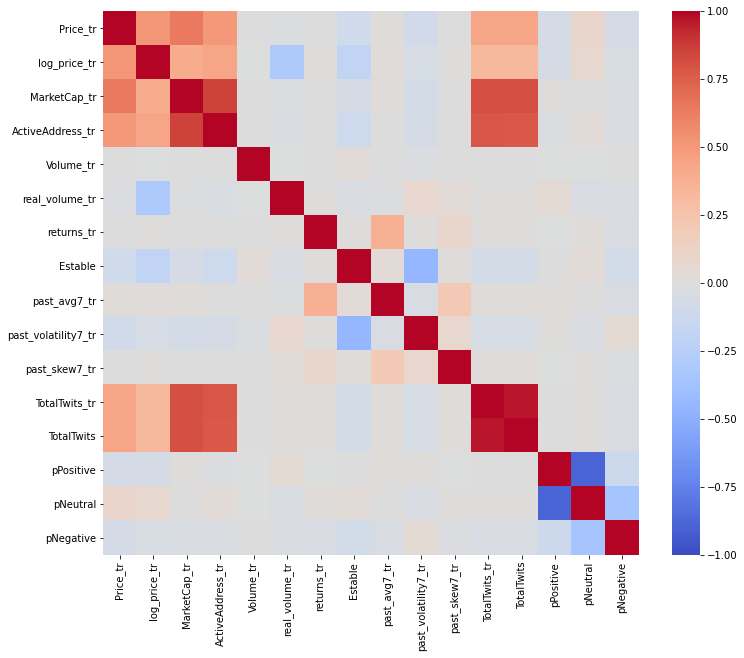

In [21]:
plt.figure(figsize=(12,10))

variables_control=['dt','Ticker','Price_tr','log_price_tr','MarketCap_tr','ActiveAddress_tr',
                   'Volume_tr','real_volume_tr',
                   'returns_tr', 'Estable','past_avg7_tr','past_volatility7_tr','past_skew7_tr',
                   'TotalTwits_tr',"TotalTwits",
                   'pPositive','pNeutral','pNegative']

dfPANEL_2=dfPANEL2[variables_control]
sns.heatmap(dfPANEL2[variables_control].corr(),vmin=-1,vmax=1,cmap="coolwarm")



In [23]:
dfPANEL2[variables_control].corr()

,Price_tr,log_price_tr,MarketCap_tr,ActiveAddress_tr,Volume_tr,real_volume_tr,returns_tr,Estable,past_avg7_tr,past_volatility7_tr,past_skew7_tr,TotalTwits_tr,TotalTwits,pPositive,pNeutral,pNegative
Price_tr,1.000000,0.522332,0.643211,0.503403,0.001236,-0.023297,0.006668,-0.094704,0.017666,-0.086767,0.004139,0.438257,0.438646,-0.065173,0.093869,-0.068998
log_price_tr,0.522332,1.000000,0.399901,0.441085,-0.003018,-0.312205,0.010777,-0.194714,0.027358,-0.049325,0.015382,0.326712,0.326765,-0.056436,0.074112,-0.044513
MarketCap_tr,0.643211,0.399901,1.000000,0.857621,0.007368,-0.014564,0.007181,-0.059912,0.020250,-0.071697,0.007554,0.808270,0.808360,0.013000,0.001840,-0.029912
ActiveAddress_tr,0.503403,0.441085,0.857621,1.000000,0.004167,-0.027576,0.002183,-0.114085,0.006330,-0.062466,0.003252,0.783145,0.779864,-0.019425,0.032490,-0.030147
Volume_tr,0.001236,-0.003018,0.007368,0.004167,1.000000,-0.001201,0.000499,0.031384,0.001251,-0.017015,0.002972,0.004050,0.003593,-0.000679,-0.000012,0.001383
real_volume_tr,-0.023297,-0.312205,-0.014564,-0.027576,-0.001201,1.000000,0.009160,-0.036401,-0.010584,0.078167,0.035488,0.013051,0.012597,0.053251,-0.038835,-0.024036
returns_tr,0.006668,0.010777,0.007181,0.002183,0.000499,0.009160,1.000000,0.013265,0.376558,0.013389,0.091775,0.008624,0.010851,-0.001480,0.016195,-0.031433
Estable,-0.094704,-0.194714,-0.059912,-0.114085,0.031384,-0.036401,0.013265,1.000000,0.034057,-0.448415,0.008299,-0.075616,-0.075538,0.003879,0.034166,-0.080318
past_avg7_tr,0.017666,0.027358,0.020250,0.006330,0.001251,-0.010584,0.376558,0.034057,1.000000,-0.035240,0.211964,0.020944,0.020988,0.016837,0.001790,-0.037478
past_volatility7_tr,-0.086767,-0.049325,-0.071697,-0.062466,-0.017015,0.078167,0.013389,-0.448415,-0.035240,1.000000,0.080544,-0.051552,-0.054411,0.011503,-0.033099,0.047287


In [24]:
data_model2=dfPANEL_2[dfPANEL_2['dt']>='2021-07-01'].set_index(['Ticker','dt']).dropna().copy()
data_model2['constant']=1

data_model2['Volume_units_tr']=data_model2['Volume_tr']/data_model2['Price_tr']
data_model2['logVolume_units_tr']=np.log(data_model2.Volume_units_tr)
data_model2['logTotalTwits_tr']=np.log(data_model2.TotalTwits_tr)

data_model2['real_volume_units_tr']=data_model2['real_volume_tr']/data_model2['Price_tr']
data_model2['logreal_volume_units_tr']=np.log(data_model2.real_volume_units_tr)

data_model2['logMarketCap_tr']=np.log(data_model2.MarketCap_tr)
data_model2['logMarketCap_units_tr']=np.log(data_model2.MarketCap_tr)/data_model2['Price_tr']
data_model2['constant']=1

data_model2['pPOSITIVE']=data_model2['pPositive']*100
data_model2['pNEGATIVE']=data_model2['pNegative']*100
data_model2['pNEUTRAL']=data_model2['pNeutral']*100

In [25]:
data_model2.columns

Index(['Price_tr', 'log_price_tr', 'MarketCap_tr', 'ActiveAddress_tr',
       'Volume_tr', 'real_volume_tr', 'returns_tr', 'Estable', 'past_avg7_tr',
       'past_volatility7_tr', 'past_skew7_tr', 'TotalTwits_tr', 'TotalTwits',
       'pPositive', 'pNeutral', 'pNegative', 'constant', 'Volume_units_tr',
       'logVolume_units_tr', 'logTotalTwits_tr', 'real_volume_units_tr',
       'logreal_volume_units_tr', 'logMarketCap_tr', 'logMarketCap_units_tr',
       'pPOSITIVE', 'pNEGATIVE', 'pNEUTRAL'],
      dtype='object')

### Indice de Positividad

$pPositive_{i,t} = \alpha + \beta log(Price_{i,t-1}) + \gamma \textbf{X}_{i,t-1}+ \epsilon_{i,t} $

#### First subimited

#### New controls: Volatility and Skewness

In [30]:
regfmRoger_pPositive2A=FamaMacBeth(data_model2.pPOSITIVE,
                                 data_model2[['constant',
                                              'log_price_tr',
                                              'logreal_volume_units_tr',
                                              'logMarketCap_tr',
                                              'returns_tr',
                                              'TotalTwits_tr'
                                             ]],
                                weights=None).fit(debiased=True,
    cov_type="robust", kernel="bartlett")

print(regfmRoger_pPositive2A)

                             FamaMacBeth Estimation Summary                            
Dep. Variable:                     pPOSITIVE   R-squared:                        0.0082
Estimator:                       FamaMacBeth   R-squared (Between):              0.0687
No. Observations:                      19793   R-squared (Within):              -0.0022
Date:                       Fri, Apr 05 2024   R-squared (Overall):              0.0082
Time:                               21:59:54   Log-likelihood                -7.786e+04
Cov. Estimator:    Fama-MacBeth Standard Cov                                           
                                               F-statistic:                      32.579
Entities:                                 39   P-value                           0.0000
Avg Obs:                              507.51   Distribution:                 F(5,19787)
Min Obs:                              344.00                                           
Max Obs:                        

In [32]:
regfmRoger_pPositive2B=FamaMacBeth(data_model2.pPOSITIVE,
                                 data_model2[['constant',
                                              'log_price_tr',
                                              'logreal_volume_units_tr',
                                           
                                              'logMarketCap_tr',
                                              'returns_tr',
                                              'TotalTwits_tr',
                                                'past_volatility7_tr',
                                              'past_skew7_tr']],
                                weights=None).fit(debiased=True,
    cov_type="robust", kernel="bartlett")

print(regfmRoger_pPositive2B)

                             FamaMacBeth Estimation Summary                            
Dep. Variable:                     pPOSITIVE   R-squared:                        0.0062
Estimator:                       FamaMacBeth   R-squared (Between):              0.0686
No. Observations:                      19793   R-squared (Within):              -0.0041
Date:                       Fri, Apr 05 2024   R-squared (Overall):              0.0062
Time:                               22:03:23   Log-likelihood                -7.788e+04
Cov. Estimator:    Fama-MacBeth Standard Cov                                           
                                               F-statistic:                      17.503
Entities:                                 39   P-value                           0.0000
Avg Obs:                              507.51   Distribution:                 F(7,19785)
Min Obs:                              344.00                                           
Max Obs:                        

### Indice de Negatividad

#### New controls: Volatility and Skewness

In [35]:
regfmRoger_pNegative2B=FamaMacBeth(data_model2.pNEGATIVE,
                                 data_model2[['constant',
                                              'log_price_tr',
                                              'logreal_volume_units_tr',
                                              'logMarketCap_tr',
                                              'returns_tr',
                                              'TotalTwits_tr']],
                                weights=None).fit(debiased=True,
    cov_type="robust", kernel="bartlett")

regfmRoger_pNegative2B

Dep. Variable:,pNEGATIVE,R-squared:,0.0086
Estimator:,FamaMacBeth,R-squared (Between):,0.0117
No. Observations:,19793,R-squared (Within):,0.0046
Date:,"Fri, Apr 05 2024",R-squared (Overall):,0.0086
Time:,22:15:33,Log-likelihood,-6.413e+04
Cov. Estimator:,Fama-MacBeth Standard Cov,,
,,F-statistic:,34.327
Entities:,39,P-value,0.0000
Avg Obs:,507.51,Distribution:,"F(5,19787)"
Min Obs:,344.00,,
Max Obs:,541.00,F-statistic (robust):,39.624


In [34]:
regfmRoger_pNegative2B=FamaMacBeth(data_model2.pNEGATIVE,
                                 data_model2[['constant',
                                              'log_price_tr',
                                              'logreal_volume_units_tr',
                                              'logMarketCap_tr',
                                              'returns_tr',
                                              'TotalTwits_tr',
                                              'past_volatility7_tr',
                                             'past_skew7_tr']],
                                weights=None).fit(debiased=True,
    cov_type="robust", kernel="bartlett")

print(regfmRoger_pNegative2B)

                             FamaMacBeth Estimation Summary                            
Dep. Variable:                     pNEGATIVE   R-squared:                        0.0039
Estimator:                       FamaMacBeth   R-squared (Between):              0.0470
No. Observations:                      19793   R-squared (Within):              -0.0160
Date:                       Fri, Apr 05 2024   R-squared (Overall):              0.0039
Time:                               22:15:22   Log-likelihood                -6.418e+04
Cov. Estimator:    Fama-MacBeth Standard Cov                                           
                                               F-statistic:                      11.191
Entities:                                 39   P-value                           0.0000
Avg Obs:                              507.51   Distribution:                 F(7,19785)
Min Obs:                              344.00                                           
Max Obs:                        

In [ ]:
regfmRoger_pNegative2C=FamaMacBeth(data_model2.pNEGATIVE,
                                 data_model2[['constant',
                                              'log_price_tr',
                                            #  'logreal_volume_units_tr',
                                           #   'logMarketCap_tr',
                                           #   'returns_tr',
                                              'Estable'
                                           #   'TotalTwits_tr'
                                             ]],
                                weights=None).fit(debiased=True,
    cov_type="kernel", kernel="bartlett")

print(regfmRoger_pNegative2C)

In [ ]:
regfmRoger_pNegative2C=FamaMacBeth(data_model2.pNEGATIVE,
                                 data_model2[['constant',
                                              'log_price_tr',
                                              'logreal_volume_units_tr',
                                              'logMarketCap_tr',
                                              'returns_tr',
                                              'Estable',
                                              'past_volatility7_tr',
                                              'past_skew7_tr',
                                              'TotalTwits_tr']],
                                weights=None).fit(debiased=True,
    cov_type="kernel", kernel="bartlett")

print(regfmRoger_pNegative2C)

### Indice de Neutralidad

In [38]:
regfmRoger_pNeutral2=FamaMacBeth(data_model2.pNEUTRAL,
                                 data_model2[['constant',
                                              'log_price_tr',
                                              'logreal_volume_units_tr',
                                              'logMarketCap_tr',
                                              'returns_tr',
                                              'TotalTwits_tr']],
                                weights=None).fit(debiased=True,cov_type='robust',kernel='bartlett')

print(regfmRoger_pNeutral2)

                             FamaMacBeth Estimation Summary                            
Dep. Variable:                      pNEUTRAL   R-squared:                        0.0048
Estimator:                       FamaMacBeth   R-squared (Between):              0.0377
No. Observations:                      19793   R-squared (Within):              -0.0040
Date:                       Fri, Apr 05 2024   R-squared (Overall):              0.0048
Time:                               22:27:19   Log-likelihood                -7.908e+04
Cov. Estimator:    Fama-MacBeth Standard Cov                                           
                                               F-statistic:                      18.899
Entities:                                 39   P-value                           0.0000
Avg Obs:                              507.51   Distribution:                 F(5,19787)
Min Obs:                              344.00                                           
Max Obs:                        

#### New controls: Volatility and Skewness

In [42]:
regfmRoger_pNeutral2=FamaMacBeth(data_model2.pNEUTRAL,
                                 data_model2[['constant',
                                              'log_price_tr',
                                              'logreal_volume_units_tr',
                                              'logMarketCap_tr',
                                              'returns_tr',
                                              'past_volatility7_tr',
                                              'past_skew7_tr',
                                              'TotalTwits_tr']],
                                weights=None).fit(debiased=True,cov_type='robust',kernel='bartlett')
print(regfmRoger_pNeutral2)

                             FamaMacBeth Estimation Summary                            
Dep. Variable:                      pNEUTRAL   R-squared:                       -0.0003
Estimator:                       FamaMacBeth   R-squared (Between):              0.0557
No. Observations:                      19793   R-squared (Within):              -0.0145
Date:                       Fri, Apr 05 2024   R-squared (Overall):             -0.0003
Time:                               22:41:24   Log-likelihood                -7.913e+04
Cov. Estimator:    Fama-MacBeth Standard Cov                                           
                                               F-statistic:                     -0.8204
Entities:                                 39   P-value                           1.0000
Avg Obs:                              507.51   Distribution:                 F(7,19785)
Min Obs:                              344.00                                           
Max Obs:                        

### Variables de control categorias Roger
$$Y_{i,t} = \alpha + \lambda PriceCat_{i,t-1}+\epsilon_{i,t} $$


In [44]:
temp_roger=data_model[['Fecha','cat_prev_price2', 
                       'cat_prev_price3', 'cat_prev_price4', 'cat_prev_price5']].reset_index()

In [45]:
dfPANEL_roger2=data_model2.reset_index().merge(temp_roger,right_on=['Ticker','fecha'],left_on=['Ticker','dt'],
                                               how='left').dropna()
data_model_roger2=dfPANEL_roger2[dfPANEL_roger2['dt']>='2021-07-01'].set_index(['Ticker','dt']).dropna().copy()

###  Indice Positividad

#### Original controls

In [49]:
regfmRoger_pPositive_2B=FamaMacBeth(
    data_model_roger2.pPOSITIVE,data_model_roger2[['constant',
                                                   'cat_prev_price2',
                                                   'cat_prev_price3',
                                                   'cat_prev_price4',
                                                   'cat_prev_price5',
                                                   'logreal_volume_units_tr',
                                                   'logMarketCap_tr',
                                                   'returns_tr',
                                                   'TotalTwits_tr'
                                                   #'past_volatility7_tr',
                                                   #'past_skew7_tr',
                                                   ]],weights=None).fit(
    debiased=True,cov_type='robust',kernel='bartlett')


regfmRoger_pPositive_2B

Dep. Variable:,pPOSITIVE,R-squared:,0.0376
Estimator:,FamaMacBeth,R-squared (Between):,0.1977
No. Observations:,19792,R-squared (Within):,0.0079
Date:,"Fri, Apr 05 2024",R-squared (Overall):,0.0376
Time:,22:52:50,Log-likelihood,-7.756e+04
Cov. Estimator:,Fama-MacBeth Standard Cov,,
,,F-statistic:,96.666
Entities:,39,P-value,0.0000
Avg Obs:,507.49,Distribution:,"F(8,19783)"
Min Obs:,344.00,,
Max Obs:,541.00,F-statistic (robust):,75.738


#### Suggested controls:
- Past 7day-Skewness 
- past 7day-Volatility

In [51]:
regfmRoger_pPositive_2C=FamaMacBeth(
    data_model_roger2.pPOSITIVE,data_model_roger2[['constant',
                                                   'cat_prev_price2',
                                                   'cat_prev_price3',
                                                   'cat_prev_price4',
                                                   'cat_prev_price5',
                                                   'logreal_volume_units_tr',
                                                   'logMarketCap_tr',
                                                   'returns_tr',
                                                   'TotalTwits_tr',
                                                   'past_volatility7_tr',
                                                   'past_skew7_tr'
                                                   ]],weights=None).fit(debiased=True,cov_type='robust')


regfmRoger_pPositive_2C

Dep. Variable:,pPOSITIVE,R-squared:,0.0366
Estimator:,FamaMacBeth,R-squared (Between):,0.1979
No. Observations:,19792,R-squared (Within):,0.0067
Date:,"Fri, Apr 05 2024",R-squared (Overall):,0.0366
Time:,22:59:18,Log-likelihood,-7.757e+04
Cov. Estimator:,Fama-MacBeth Standard Cov,,
,,F-statistic:,75.190
Entities:,39,P-value,0.0000
Avg Obs:,507.49,Distribution:,"F(10,19781)"
Min Obs:,344.00,,
Max Obs:,541.00,F-statistic (robust):,62.745


###  Indice Positividad

#### Original controls

In [58]:
regfmRoger_pNeutral_2C=FamaMacBeth(
    data_model_roger2.pNEUTRAL,data_model_roger2[['constant',
                                                   'cat_prev_price2',
                                                   'cat_prev_price3',
                                                   'cat_prev_price4',
                                                   'cat_prev_price5',
                                                   'logreal_volume_units_tr',
                                                   'logMarketCap_tr',
                                                   'returns_tr',
                                                   'TotalTwits_tr',   
                                                   'past_volatility7_tr',
                                                   'past_skew7_tr']],weights=None).fit(debiased=True,cov_type='robust')


regfmRoger_pNeutral_2C

Dep. Variable:,pNEUTRAL,R-squared:,0.0445
Estimator:,FamaMacBeth,R-squared (Between):,0.2088
No. Observations:,19792,R-squared (Within):,0.0004
Date:,"Fri, Apr 05 2024",R-squared (Overall):,0.0445
Time:,23:21:01,Log-likelihood,-7.867e+04
Cov. Estimator:,Fama-MacBeth Standard Cov,,
,,F-statistic:,92.126
Entities:,39,P-value,0.0000
Avg Obs:,507.49,Distribution:,"F(10,19781)"
Min Obs:,344.00,,
Max Obs:,541.00,F-statistic (robust):,75.822


In [59]:
regfmRoger_pNeutral_2NC=FamaMacBeth(
    data_model_roger2.pNEUTRAL,data_model_roger2[['constant',
                                                   'cat_prev_price2',
                                                   'cat_prev_price3',
                                                   'cat_prev_price4',
                                                   'cat_prev_price5',
                                                   'logreal_volume_units_tr',
                                                   'logMarketCap_tr',
                                                   'returns_tr',
                                                   'TotalTwits_tr',
                                                 ]],weights=None).fit(debiased=True,cov_type='robust')


regfmRoger_pNeutral_2NC


Dep. Variable:,pNEUTRAL,R-squared:,0.0442
Estimator:,FamaMacBeth,R-squared (Between):,0.2044
No. Observations:,19792,R-squared (Within):,0.0012
Date:,"Fri, Apr 05 2024",R-squared (Overall):,0.0442
Time:,23:21:04,Log-likelihood,-7.867e+04
Cov. Estimator:,Fama-MacBeth Standard Cov,,
,,F-statistic:,114.39
Entities:,39,P-value,0.0000
Avg Obs:,507.49,Distribution:,"F(8,19783)"
Min Obs:,344.00,,
Max Obs:,541.00,F-statistic (robust):,101.97


In [66]:
regfmRoger_pNegative_2C=FamaMacBeth(
    data_model_roger2.pNEGATIVE,data_model_roger2[['constant',
                                                   'cat_prev_price2',
                                                   'cat_prev_price3',
                                                   'cat_prev_price4',
                                                   'cat_prev_price5',
                                                   'logreal_volume_units_tr',
                                                   'logMarketCap_tr',
                                                   'returns_tr',
                                                   'TotalTwits_tr']],weights=None).fit(
    debiased=True,cov_type='robust',kernel='bartlett')


regfmRoger_pNegative_2C

Dep. Variable:,pNEGATIVE,R-squared:,0.0194
Estimator:,FamaMacBeth,R-squared (Between):,0.0671
No. Observations:,19792,R-squared (Within):,-0.0010
Date:,"Fri, Apr 05 2024",R-squared (Overall):,0.0194
Time:,23:29:26,Log-likelihood,-6.402e+04
Cov. Estimator:,Fama-MacBeth Standard Cov,,
,,F-statistic:,48.888
Entities:,39,P-value,0.0000
Avg Obs:,507.49,Distribution:,"F(8,19783)"
Min Obs:,344.00,,
Max Obs:,541.00,F-statistic (robust):,48.240


In [68]:
regfmRoger_pNeg_2NC=FamaMacBeth(
    data_model_roger2.pNEGATIVE,data_model_roger2[['constant',
                                                   'cat_prev_price2',
                                                   'cat_prev_price3',
                                                   'cat_prev_price4',
                                                   'cat_prev_price5',
                                                   'logreal_volume_units_tr',
                                                   'logMarketCap_tr',
                                                   'returns_tr',
                                                   'TotalTwits_tr',   
                                                   'past_volatility7_tr',
                                                   'past_skew7_tr'
                                                 ]],weights=None).fit(debiased=True,cov_type='robust',kernel='bartlett')


regfmRoger_pNeg_2NC


Dep. Variable:,pNEGATIVE,R-squared:,0.0167
Estimator:,FamaMacBeth,R-squared (Between):,0.0878
No. Observations:,19792,R-squared (Within):,-0.0128
Date:,"Fri, Apr 05 2024",R-squared (Overall):,0.0167
Time:,23:29:35,Log-likelihood,-6.405e+04
Cov. Estimator:,Fama-MacBeth Standard Cov,,
,,F-statistic:,33.543
Entities:,39,P-value,0.0000
Avg Obs:,507.49,Distribution:,"F(10,19781)"
Min Obs:,344.00,,
Max Obs:,541.00,F-statistic (robust):,25.111


### REGRESIONES CON NUEVAS VARIABLES DE CONTROL

In order to account for cryptocurrency specif attributes impacts, we add additional tests on unseen variables. For a first robustness check we prform some new analysis adding dummy variable that accounts if cryptocurrency is or not stable. Results are shown for both discrete and continuous regressions as follows.

In [ ]:
regfmRoger_pPositive_2_NC1=FamaMacBeth(
    data_model_roger2.pPOSITIVE,data_model_roger2[['constant',
                                                   'cat_prev_price2',
                                                   'cat_prev_price3','cat_prev_price4',
                                                    'cat_prev_price5',
                                                  'Estable',
                                                   'past_volatility7_r',
                                              'logreal_volume_units_tr',
                                              'returns_tr',
                                              'logMarketCap_tr',
                                              'TotalTwits_tr']],weights=None).fit(debiased=True,cov_type='robust')


regfmRoger_pPositive_2_NC1

In [ ]:
regfmRoger_pNegative_2_NC1=FamaMacBeth(
    data_model_roger2.pNEGATIVE,data_model_roger2[['constant',
                                                   'cat_prev_price2',
                                                   'cat_prev_price3','cat_prev_price4',
                                                    'cat_prev_price5',
                                                   'Estable',
                                                   'past_volatility7_r',
                                              'logreal_volume_units_tr',
                                              'returns_tr',
                                              'logMarketCap_tr',
                                              'TotalTwits_tr']],weights=None).fit(debiased=True,cov_type='robust')


regfmRoger_pNegative_2_NC1

In [ ]:
# **PanelOLS**
regPanel_pPositive=PanelOLS(data_model.pPOSITIVE,data_model[['constant','log_price_1']]).fit(debiased=True,
    cov_type="kernel", kernel="bartlett")

print(regPanel_pPositive)